In [86]:
import pandas as pd
from Bio import pairwise2
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
from Bio.SubsMat import MatrixInfo as matlist
from math import log

In [43]:
distance_mx = pd.read_table("distances-physical.tsv", sep=" ")
"""distance_mx = pd.DataFrame({'D': [0.000,0.371,0.404,0.399,0.415,0.450,0.496,0.547,0.561,0.574,0.567,0.644,0.644,0.636,0.755,0.680,0.746,0.754,1.260,1.350], 
                            'L': [0.371,0.000,0.407,0.400,0.413,0.473,0.509,0.551,0.598,0.601,0.590,0.658,0.658,0.654,0.767,0.685,0.763,0.773,1.265,1.336],
                            'E': [0.404,0.407,0.000,0.376,0.420,0.467,0.423,0.617,0.696,0.703,0.665,0.737,0.732,0.677,0.811,0.709,0.828,0.813,1.285,1.302],
                            'N': [0.399,0.400,0.376,0.000,0.411,0.459,0.499,0.605,0.644,0.652,0.621,0.688,0.688,0.668,0.756,0.678,0.813,0.813,1.276,1.364],
                            'L': [0.415,0.413,0.420,0.411,0.000,0.439,0.577,0.556,0.555,0.579,0.640,0.649,0.656,0.759,0.796,0.713,0.643,0.620,1.316,1.394],
                            },
                      index=['D', 'L'])"""
print(distance_mx)
gap_score = distance_mx.mean(axis=1).mean(axis=0)
print(gap_score)
print(distance_mx['D']['L'])

       F      L      I      M      V      S      P      T      A      Y  \
F  0.000  1.160  1.189  1.031  1.855  4.544  3.675  3.166  4.110  2.062   
L  1.160  0.000  0.368  1.435  0.831  4.189  3.209  2.770  3.562  2.543   
I  1.189  0.368  0.000  1.565  0.873  4.420  3.531  3.064  3.721  2.805   
M  1.031  1.435  1.565  0.000  1.879  3.618  3.014  2.404  3.263  1.853   
V  1.855  0.831  0.873  1.879  0.000  3.936  3.075  2.627  3.125  3.100   
S  4.544  4.189  4.420  3.618  3.936  0.000  1.986  1.697  1.295  4.033   
P  3.675  3.209  3.531  3.014  3.075  1.986  0.000  0.869  2.276  2.909   
T  3.166  2.770  3.064  2.404  2.627  1.697  0.869  0.000  1.795  2.691   
A  4.110  3.562  3.721  3.263  3.125  1.295  2.276  1.795  0.000  4.177   
Y  2.062  2.543  2.805  1.853  3.100  4.033  2.909  2.691  4.177  0.000   
H  4.093  4.168  4.367  3.513  4.346  3.900  3.357  3.308  4.199  3.105   
Q  3.889  3.892  4.214  3.243  4.074  2.764  1.882  2.070  3.489  2.240   
N  4.402  4.251  4.552  3

In [92]:
generated_seq = "MSSLTKFTNKYSKQLTIKNELIPVGKTLENIKENGLIDGDEQLNENYQKAKIIVDDFLRDFINKALNNTQIGNWRELADALNKEDEDNIEKLQDKIRGIIVSKFETFDLFSSYSIKKDEKIIDDDNDVEEEELDLGKKTSSFKYIFKKNLFKLVLPSYLKTTNQDKLKIISSFDNFSTYFRGFFENRKNIFTKKPISTSIAYRIVHDNFPKFLDNIRCFNVWQTECPQLIVKADNYLKSKNVIAKDKSLANYFTVGAYDYFLSQNGIDFYNNIIGGLPAFA"
real_seq = "MEDYSGFVNIYSIQKTLRFELKPVGKTLEHIEKKGFLKKDKIRAEDYKAVKKIIDKYHRAYIEEVFDSVLHQKKKKDKTRFSTQFIKEIKEFSELYYKTEKNIPDKERLEALSEKLRKMLVGAFKGEFSEEVAEKYKNLFSKELIRNEIEKFCETDEERKQVSNFKSFTTYFTGFHSNRQNIYSDEKKSTAIGYRIIHQNLPKFLDNLKIIESIQRRFKDFPWSDLKKNLKKIDKNIKLTEYFSIDGFVNVLNQKGIDAYNTILGGKSEESGEKIQGLNEY"

In [93]:
matrix = matlist.blosum62
def gap_function(x, y):  # x is gap position in seq, y is gap length
    if y == 0:  # No gap
        return 0
    elif y == 1:  # Gap open penalty
        return -10
    return -0.5 # Gap extend penalty

alignments = pairwise2.align.globaldc(generated_seq,real_seq, matrix, gap_function, gap_function)

generated_ali = alignments[0][0]
real_ali = alignments[0][1]
scores = []
x_lab = []
for pos, gen_aa in enumerate(generated_ali):
    real_aa = real_ali[pos]
    if real_aa=="-" or gen_aa=="-":
        pos_score = gap_score
    else:
        pos_score = distance_mx[gen_aa][real_aa]
    scores.append(pos_score)
    x_lab.append(gen_aa+"\n"+real_aa+"\n"+str(pos))
avg_score = sum(scores)/float(len(scores))

8


<function matplotlib.pyplot.show(*args, **kw)>

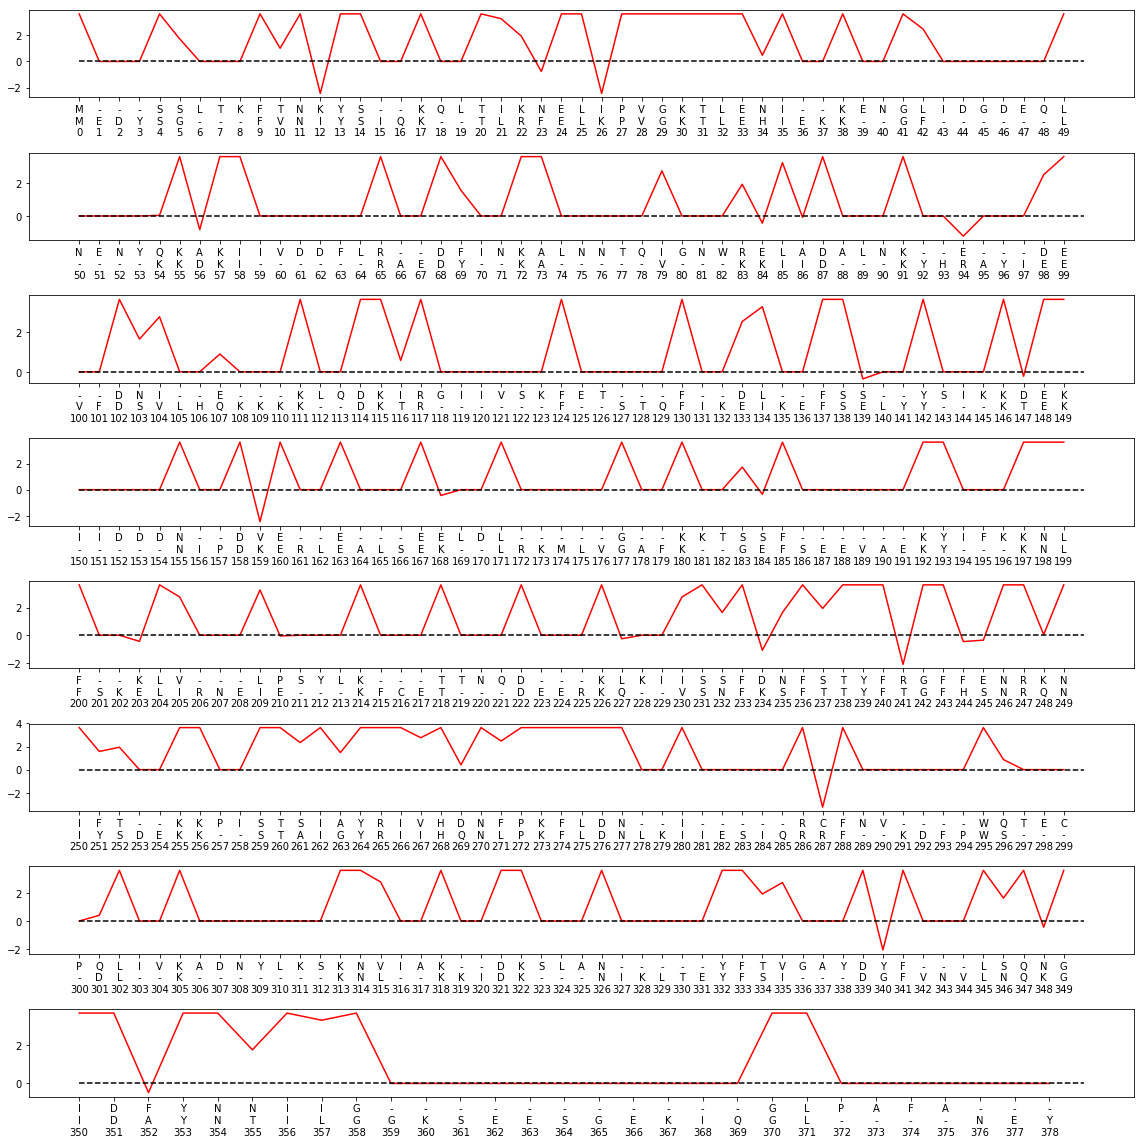

In [95]:
def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 
n=50
#gen_chunks = divide_chunks(generated_ali, n)
#real_chunks = divide_chunks(real_ali, n)
x_lab_chunks = list(divide_chunks(x_lab, n))
score_chunks = list(divide_chunks(scores, n))
print(len(score_chunks))
plt.figure(figsize = (16,2*len(score_chunks)))
for i, chunk in enumerate(score_chunks):
    plt.subplot(len(score_chunks),1,i+1)
    xs = np.arange(len(chunk))
    plt.xticks(xs, x_lab_chunks[i])
    plt.plot(xs,gap_score-chunk,color='red')
    plt.plot([0, len(chunk)], [0, 0], "k--")

plt.tight_layout()
plt.show